In [1]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
tfds.disable_progress_bar()

In [2]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
train_dataset.element_spec

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [3]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [4]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [5]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [6]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [2]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

# SGD

In [40]:
model_sgd = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [41]:
optimizer = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='SGD'
)

model_sgd.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

In [42]:
history_sgd = model_sgd.fit(train_dataset, epochs=50,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/50
391/391 [==============================] - 40s 83ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.4917
Epoch 2/50
391/391 [==============================] - 27s 69ms/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.4917
Epoch 3/50
391/391 [==============================] - 26s 66ms/step - loss: 0.6926 - accuracy: 0.5000 - val_loss: 0.6925 - val_accuracy: 0.4917
Epoch 4/50
391/391 [==============================] - 26s 66ms/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.4917
Epoch 5/50
391/391 [==============================] - 26s 66ms/step - loss: 0.6923 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.4917
Epoch 6/50
391/391 [==============================] - 27s 68ms/step - loss: 0.6921 - accuracy: 0.5000 - val_loss: 0.6920 - val_accuracy: 0.4917
Epoch 7/50
391/391 [==============================] - 27s 70ms/step - loss: 0.6920 - accuracy: 0.5000 - val_loss: 0.6918 - val_accuracy:

In [43]:
test_loss, test_acc = model_sgd.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 12s 30ms/step - loss: 0.4555 - accuracy: 0.7756
Test Loss: 0.4554542601108551
Test Accuracy: 0.775600016117096


(0.0, 0.8002186417579651)

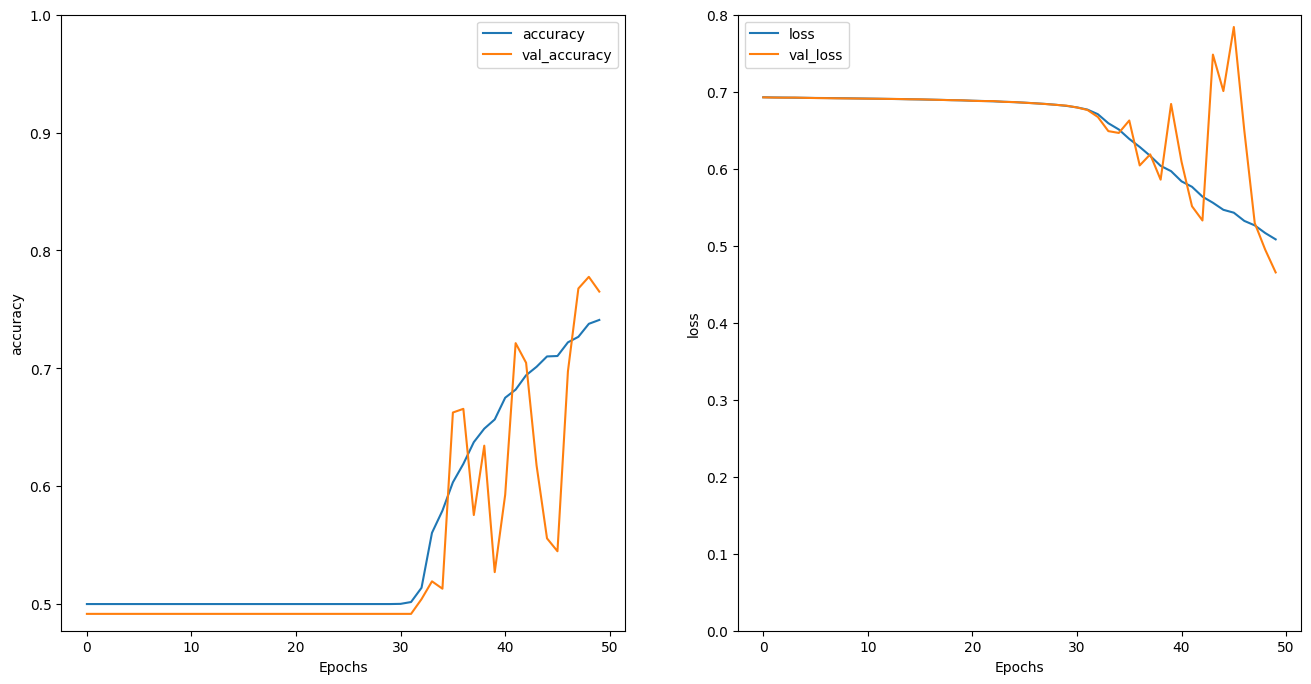

In [44]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_sgd, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_sgd, 'loss')
plt.ylim(0, None)

# SGD Momentum

In [45]:
model_sgd_m = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [46]:
optimizer = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.01,
    momentum=0.9,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='SGD'
)

model_sgd_m.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

In [47]:
history_sgd_m = model_sgd_m.fit(train_dataset, epochs=50,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/50
391/391 [==============================] - 45s 95ms/step - loss: 0.6925 - accuracy: 0.5000 - val_loss: 0.6911 - val_accuracy: 0.4917
Epoch 2/50
391/391 [==============================] - 28s 72ms/step - loss: 0.6905 - accuracy: 0.5000 - val_loss: 0.6892 - val_accuracy: 0.4917
Epoch 3/50
391/391 [==============================] - 27s 70ms/step - loss: 0.6872 - accuracy: 0.5009 - val_loss: 0.6839 - val_accuracy: 0.4927
Epoch 4/50
391/391 [==============================] - 26s 67ms/step - loss: 0.6735 - accuracy: 0.5219 - val_loss: 0.6669 - val_accuracy: 0.4974
Epoch 5/50
391/391 [==============================] - 27s 67ms/step - loss: 0.6321 - accuracy: 0.6075 - val_loss: 0.6069 - val_accuracy: 0.5943
Epoch 6/50
391/391 [==============================] - 27s 68ms/step - loss: 0.5752 - accuracy: 0.6790 - val_loss: 0.8343 - val_accuracy: 0.5146
Epoch 7/50
391/391 [==============================] - 26s 66ms/step - loss: 0.5448 - accuracy: 0.7096 - val_loss: 0.4993 - val_accuracy:

In [48]:
test_loss, test_acc = model_sgd_m.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 13s 33ms/step - loss: 0.3182 - accuracy: 0.8550
Test Loss: 0.31819918751716614
Test Accuracy: 0.854960024356842


(0.0, 0.8608547270298004)

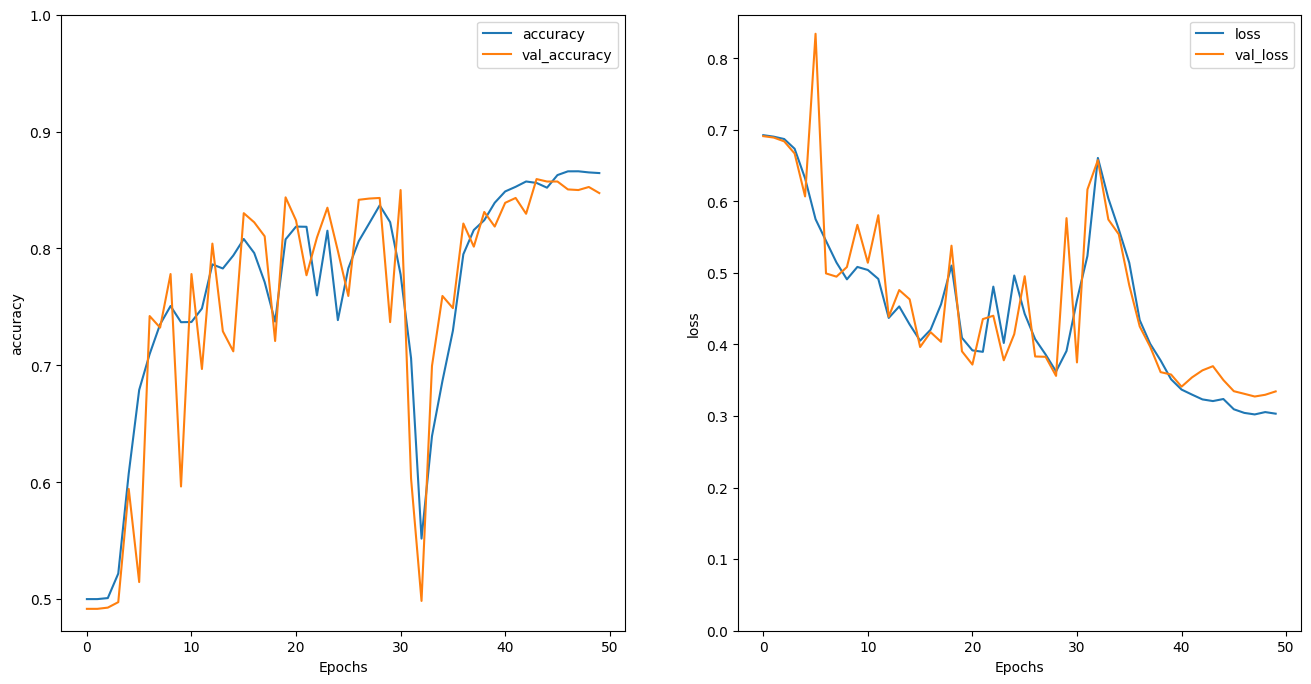

In [49]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_sgd_m, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_sgd_m, 'loss')
plt.ylim(0, None)

# SGD Nesterov

In [50]:
model_sgd_n = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [51]:
optimizer = tf.keras.optimizers.experimental.SGD(
    learning_rate=0.01,
    momentum=0.9,
    nesterov=True,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='SGD'
)

model_sgd_n.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

In [52]:
history_sgd_n = model_sgd_n.fit(train_dataset, epochs=50,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/50
391/391 [==============================] - 45s 94ms/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6925 - val_accuracy: 0.4917
Epoch 2/50
391/391 [==============================] - 28s 71ms/step - loss: 0.6913 - accuracy: 0.5000 - val_loss: 0.6903 - val_accuracy: 0.4917
Epoch 3/50
391/391 [==============================] - 27s 69ms/step - loss: 0.6886 - accuracy: 0.5000 - val_loss: 0.6863 - val_accuracy: 0.4917
Epoch 4/50
391/391 [==============================] - 27s 68ms/step - loss: 0.6750 - accuracy: 0.5192 - val_loss: 0.6563 - val_accuracy: 0.5036
Epoch 5/50
391/391 [==============================] - 28s 70ms/step - loss: 0.6186 - accuracy: 0.6266 - val_loss: 0.5685 - val_accuracy: 0.7099
Epoch 6/50
391/391 [==============================] - 27s 68ms/step - loss: 0.5674 - accuracy: 0.6965 - val_loss: 0.5296 - val_accuracy: 0.7615
Epoch 7/50
391/391 [==============================] - 26s 65ms/step - loss: 0.5308 - accuracy: 0.7178 - val_loss: 0.5032 - val_accuracy:

In [53]:
test_loss, test_acc = model_sgd_n.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 13s 33ms/step - loss: 0.3002 - accuracy: 0.8646
Test Loss: 0.30015838146209717
Test Accuracy: 0.8646399974822998


(0.0, 0.7145132750272751)

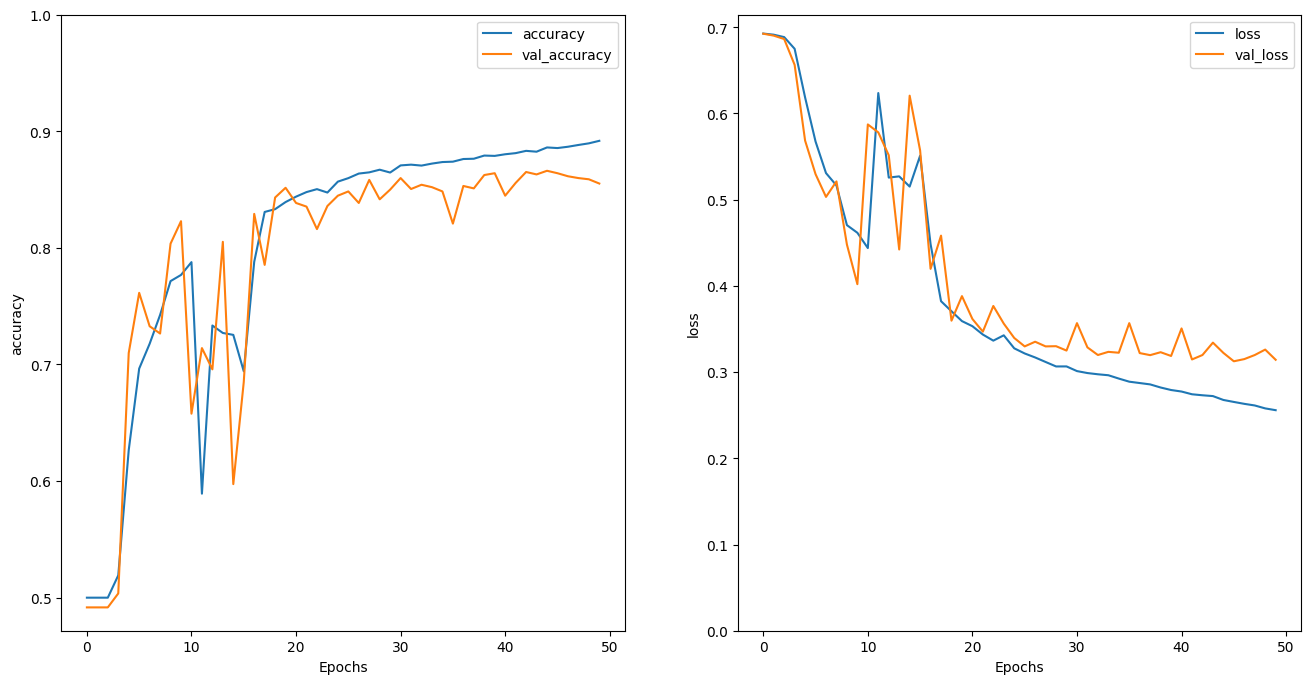

In [54]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_sgd_n, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_sgd_n, 'loss')
plt.ylim(0, None)

# AdaGrad

In [15]:
model_adagrad = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [16]:
optimizer = tf.keras.optimizers.experimental.Adagrad(
    learning_rate=0.01,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adagrad')

model_adagrad.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

In [17]:
history_adagrad = model_adagrad.fit(train_dataset, epochs=50,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/50
391/391 [==============================] - 46s 96ms/step - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.4917
Epoch 2/50
391/391 [==============================] - 28s 71ms/step - loss: 0.6925 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.4917
Epoch 3/50
391/391 [==============================] - 24s 62ms/step - loss: 0.6921 - accuracy: 0.5000 - val_loss: 0.6919 - val_accuracy: 0.4917
Epoch 4/50
391/391 [==============================] - 29s 73ms/step - loss: 0.6915 - accuracy: 0.5000 - val_loss: 0.6916 - val_accuracy: 0.4917
Epoch 5/50
391/391 [==============================] - 25s 64ms/step - loss: 0.6908 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.4917
Epoch 6/50
391/391 [==============================] - 24s 61ms/step - loss: 0.6898 - accuracy: 0.5000 - val_loss: 0.6905 - val_accuracy: 0.4917
Epoch 7/50
391/391 [==============================] - 25s 64ms/step - loss: 0.6883 - accuracy: 0.5000 - val_loss: 0.6879 - val_accuracy:

In [68]:
test_loss, test_acc = model_adagrad.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 15s 37ms/step - loss: 0.6910 - accuracy: 0.5000
Test Loss: 0.6909525990486145
Test Accuracy: 0.5


(0.0, 0.6931424796581268)

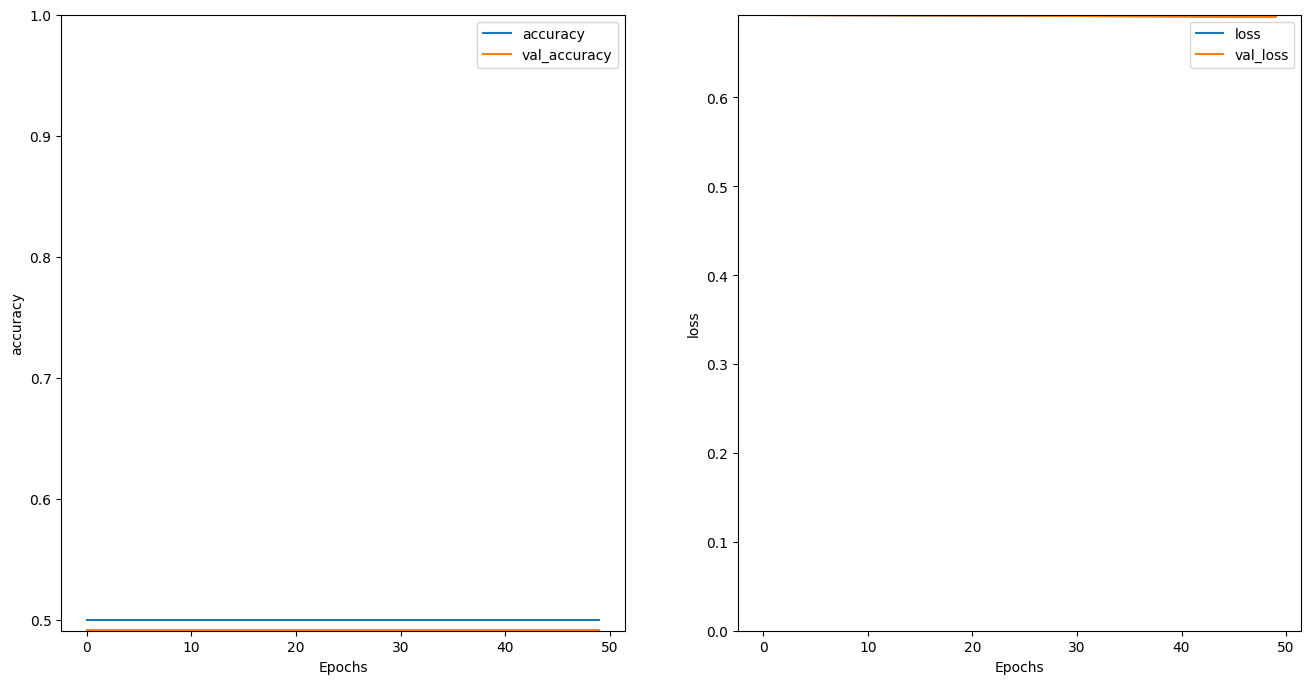

In [69]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_adagrad, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_adagrad, 'loss')
plt.ylim(0, None)

# RMSProp

In [72]:
model_rmsprop = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [73]:
optimizer = tf.keras.optimizers.experimental.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=100,
    jit_compile=True,
    name='RMSprop'
)

model_rmsprop.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

In [74]:
history_rmsprop = model_rmsprop.fit(train_dataset, epochs=50,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/50
391/391 [==============================] - 45s 94ms/step - loss: 0.5221 - accuracy: 0.7058 - val_loss: 0.3836 - val_accuracy: 0.8203
Epoch 2/50
391/391 [==============================] - 30s 75ms/step - loss: 0.3708 - accuracy: 0.8358 - val_loss: 0.3953 - val_accuracy: 0.8458
Epoch 3/50
391/391 [==============================] - 26s 67ms/step - loss: 0.3490 - accuracy: 0.8478 - val_loss: 0.3659 - val_accuracy: 0.8562
Epoch 4/50
391/391 [==============================] - 27s 68ms/step - loss: 0.3342 - accuracy: 0.8536 - val_loss: 0.4043 - val_accuracy: 0.8031
Epoch 5/50
391/391 [==============================] - 26s 67ms/step - loss: 0.3243 - accuracy: 0.8582 - val_loss: 0.3533 - val_accuracy: 0.8182
Epoch 6/50
391/391 [==============================] - 27s 67ms/step - loss: 0.3093 - accuracy: 0.8646 - val_loss: 0.3478 - val_accuracy: 0.8354
Epoch 7/50
391/391 [==============================] - 28s 71ms/step - loss: 0.2981 - accuracy: 0.8712 - val_loss: 0.3430 - val_accuracy:

In [75]:
test_loss, test_acc = model_rmsprop.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 12s 30ms/step - loss: 1.6523 - accuracy: 0.8257
Test Loss: 1.6522668600082397
Test Accuracy: 0.8256800174713135


(0.0, 1.8047776798252015)

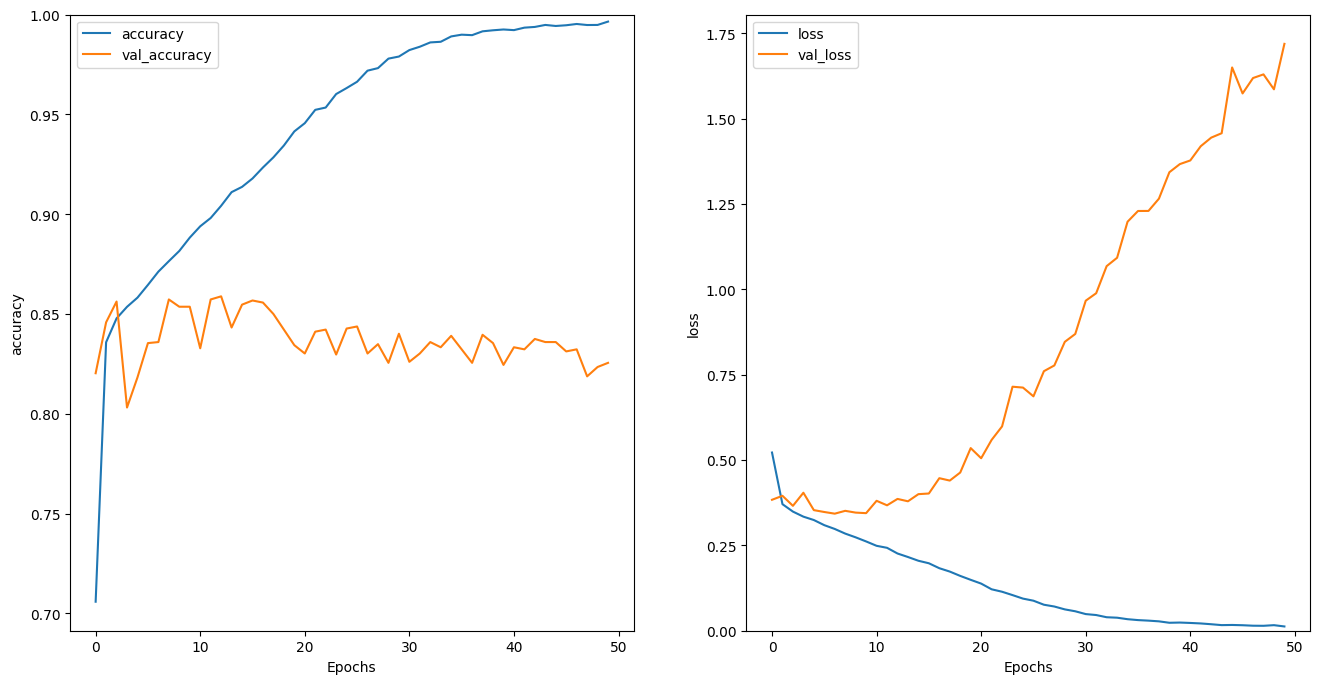

In [76]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_rmsprop, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_rmsprop, 'loss')
plt.ylim(0, None)

# Adam

In [8]:
model_adam = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [9]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam'
)

model_adam.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

In [10]:
history_adam = model_adam.fit(train_dataset, epochs=50,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/50
391/391 [==============================] - 51s 102ms/step - loss: 0.4699 - accuracy: 0.7522 - val_loss: 0.3475 - val_accuracy: 0.8422
Epoch 2/50
391/391 [==============================] - 25s 65ms/step - loss: 0.3501 - accuracy: 0.8468 - val_loss: 0.3501 - val_accuracy: 0.8615
Epoch 3/50
391/391 [==============================] - 25s 63ms/step - loss: 0.3280 - accuracy: 0.8552 - val_loss: 0.3619 - val_accuracy: 0.8385
Epoch 4/50
391/391 [==============================] - 25s 62ms/step - loss: 0.3057 - accuracy: 0.8664 - val_loss: 0.3297 - val_accuracy: 0.8552
Epoch 5/50
391/391 [==============================] - 24s 62ms/step - loss: 0.2891 - accuracy: 0.8739 - val_loss: 0.3511 - val_accuracy: 0.8458
Epoch 6/50
391/391 [==============================] - 26s 66ms/step - loss: 0.2675 - accuracy: 0.8833 - val_loss: 0.3567 - val_accuracy: 0.8557
Epoch 7/50
391/391 [==============================] - 24s 61ms/step - loss: 0.2600 - accuracy: 0.8880 - val_loss: 0.3530 - val_accuracy

In [12]:
test_loss, test_acc = model_adam.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 12s 30ms/step - loss: 1.2513 - accuracy: 0.8290
Test Loss: 1.2513238191604614
Test Accuracy: 0.829039990901947


(0.0, 1.6247057632077486)

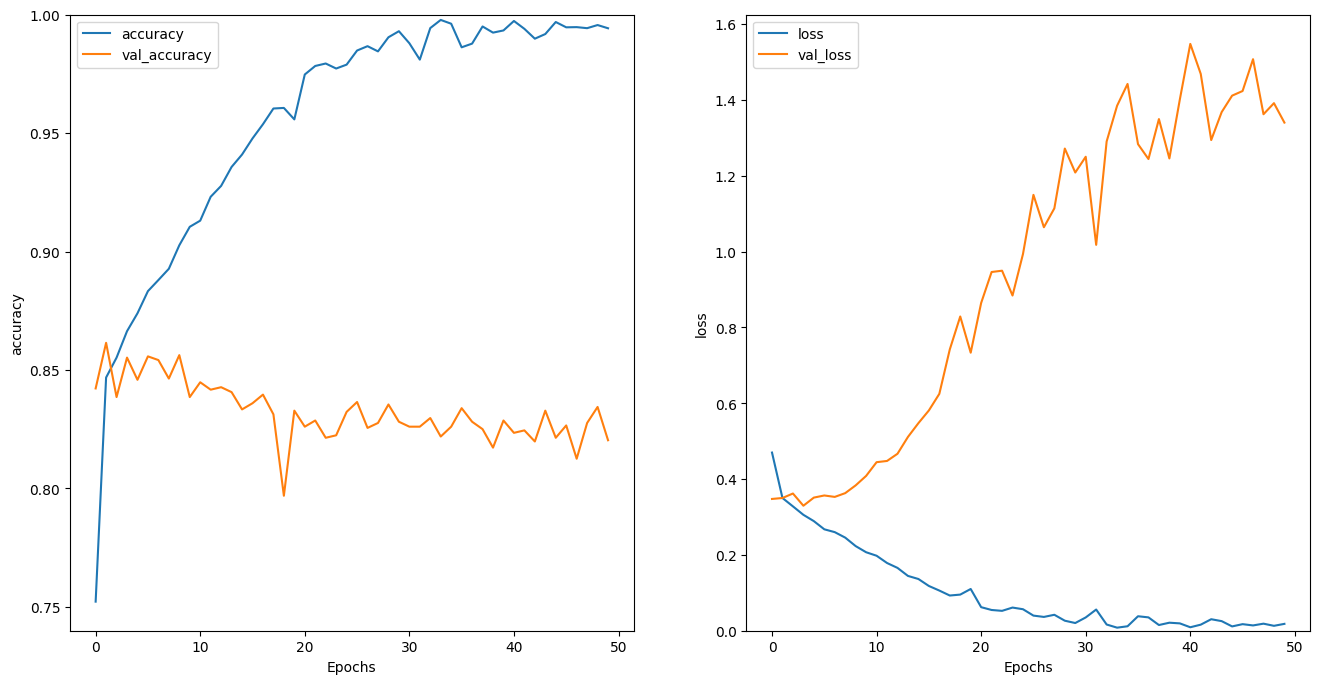

In [13]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_adam, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_adam, 'loss')
plt.ylim(0, None)

# Accuracy And Loss Graphs

In [5]:
# Replace these lists with the actual lists from your training logs
# Example lists with 50 epochs (adjust based on your actual number of epochs)

# Training metrics
train_accuracy_sgd = [0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
                  0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
                  0.5002, 0.5017, 0.5138, 0.5604, 0.5792, 0.6033, 0.6189, 0.6374, 0.6488, 0.6566,
                  0.6750, 0.6819, 0.6941, 0.7013, 0.7101, 0.7104, 0.7220, 0.7267, 0.7378, 0.7410]

train_loss_sgd = [0.6930, 0.6927, 0.6926, 0.6924, 0.6923, 0.6921, 0.6920, 0.6918, 0.6917, 0.6915,
              0.6913, 0.6911, 0.6909, 0.6906, 0.6904, 0.6902, 0.6899, 0.6896, 0.6892, 0.6889,
              0.6885, 0.6882, 0.6877, 0.6872, 0.6866, 0.6860, 0.6852, 0.6843, 0.6832, 0.6818,
              0.6798, 0.6770, 0.6710, 0.6593, 0.6512, 0.6389, 0.6284, 0.6169, 0.6039, 0.5970,
              0.5838, 0.5767, 0.5639, 0.5560, 0.5468, 0.5430, 0.5324, 0.5266, 0.5166, 0.5084]

# Validation metrics
val_accuracy_sgd = [0.4917, 0.4917, 0.4917, 0.4917, 0.4917, 0.4917, 0.4917, 0.4917, 0.4917, 0.4917,
                0.4917, 0.4917, 0.4917, 0.4917, 0.4917, 0.4917, 0.4917, 0.4917, 0.4917, 0.4917,
                0.4917, 0.4917, 0.4917, 0.4917, 0.4917, 0.4917, 0.4917, 0.4917, 0.4917, 0.4917,
                0.4917, 0.4917, 0.5042, 0.5193, 0.5130, 0.6625, 0.6656, 0.5755, 0.6344, 0.5271,
                0.5927, 0.7214, 0.7047, 0.6177, 0.7776, 0.7651]

val_loss_sgd = [0.6929, 0.6926, 0.6925, 0.6926, 0.6922, 0.6920, 0.6918, 0.6916, 0.6915, 0.6913,
            0.6911, 0.6910, 0.6909, 0.6907, 0.6904, 0.6903, 0.6899, 0.6895, 0.6892, 0.6891,
            0.6884, 0.6880, 0.6880, 0.6870, 0.6867, 0.6859, 0.6851, 0.6842, 0.6831, 0.6821,
            0.6797, 0.6765, 0.6674, 0.6490, 0.6466, 0.6628, 0.6044, 0.6188, 0.5859, 0.6843,
            0.6091, 0.5514, 0.5329, 0.7484, 0.7010, 0.7843, 0.6500, 0.5296, 0.4950, 0.4655]

In [6]:
# Training metrics
train_accuracy_sgd_m = [0.5000, 0.5000, 0.5000, 0.5192, 0.6266, 0.6965, 0.7178, 0.7425, 0.7715, 0.7768,
                         0.7878, 0.5892, 0.7334, 0.7270, 0.7254, 0.6942, 0.7880, 0.8308, 0.8332, 0.8393,
                         0.8440, 0.8479, 0.8504, 0.8475, 0.8568, 0.8598, 0.8638, 0.8648, 0.8671, 0.8646,
                         0.8708, 0.8714, 0.8706, 0.8723, 0.8736, 0.8740, 0.8762, 0.8765, 0.8792, 0.8789,
                         0.8803, 0.8813, 0.8832, 0.8825, 0.8862, 0.8856, 0.8868, 0.8883, 0.8897, 0.8918]

train_loss_sgd_m = [0.6927, 0.6913, 0.6886, 0.6750, 0.6186, 0.5674, 0.5308, 0.5165, 0.4704, 0.4616,
                     0.4439, 0.6237, 0.5256, 0.5270, 0.5152, 0.5510, 0.4484, 0.3822, 0.3706, 0.3591,
                     0.3532, 0.3435, 0.3365, 0.3427, 0.3276, 0.3216, 0.3170, 0.3117, 0.3065, 0.3066,
                     0.3012, 0.2989, 0.2975, 0.2963, 0.2925, 0.2889, 0.2873, 0.2857, 0.2821, 0.2792,
                     0.2774, 0.2743, 0.2731, 0.2722, 0.2677, 0.2654, 0.2632, 0.2613, 0.2579, 0.2558]

# Validation metrics
val_accuracy_sgd_m = [0.4917, 0.4917, 0.4917, 0.5036, 0.7099, 0.7615, 0.7328, 0.7266, 0.8036, 0.8229,
                        0.6578, 0.7141, 0.6958, 0.8052, 0.5974, 0.6849, 0.8292, 0.7854, 0.8432, 0.8516,
                        0.8385, 0.8354, 0.8161, 0.8359, 0.8448, 0.8484, 0.8385, 0.8583, 0.8417, 0.8500,
                        0.8599, 0.8505, 0.8542, 0.8521, 0.8484, 0.8208, 0.8531, 0.8510, 0.8625, 0.8641,
                        0.8448, 0.8557, 0.8651, 0.8630, 0.8661, 0.8641, 0.8615, 0.8599, 0.8589, 0.8552]

val_loss_sgd_m = [0.6925, 0.6903, 0.6863, 0.6563, 0.5685, 0.5296, 0.5032, 0.5212, 0.4479, 0.4020,
                    0.5873, 0.5780, 0.5515, 0.4422, 0.6206, 0.5571, 0.4197, 0.4583, 0.3596, 0.3881,
                    0.3616, 0.3469, 0.3767, 0.3562, 0.3396, 0.3298, 0.3352, 0.3298, 0.3300, 0.3250,
                    0.3568, 0.3287, 0.3198, 0.3235, 0.3224, 0.3568, 0.3220, 0.3197, 0.3231, 0.3187,
                    0.3506, 0.3146, 0.3198, 0.3342, 0.3223, 0.3125, 0.3151, 0.3198, 0.3261, 0.3143]


In [7]:
# Training metrics
train_accuracy_sgd_n = [0.5000, 0.5000, 0.5000, 0.5192, 0.6266, 0.6965, 0.7178, 0.7425, 0.7715, 0.7768,
                        0.7878, 0.5892, 0.7334, 0.7270, 0.7254, 0.6942, 0.7880, 0.8308, 0.8332, 0.8393,
                        0.8440, 0.8479, 0.8504, 0.8475, 0.8568, 0.8598, 0.8638, 0.8648, 0.8671, 0.8646,
                        0.8708, 0.8714, 0.8706, 0.8723, 0.8736, 0.8740, 0.8762, 0.8765, 0.8792, 0.8789,
                        0.8803, 0.8813, 0.8832, 0.8825, 0.8862, 0.8856, 0.8868, 0.8883, 0.8897, 0.8918]

train_loss_sgd_n = [0.6927, 0.6913, 0.6886, 0.6750, 0.6186, 0.5674, 0.5308, 0.5165, 0.4704, 0.4616,
                    0.4439, 0.6237, 0.5256, 0.5270, 0.5152, 0.5510, 0.4484, 0.3822, 0.3706, 0.3591,
                    0.3532, 0.3435, 0.3365, 0.3427, 0.3276, 0.3216, 0.3170, 0.3117, 0.3065, 0.3066,
                    0.3012, 0.2989, 0.2975, 0.2963, 0.2925, 0.2889, 0.2873, 0.2857, 0.2821, 0.2792,
                    0.2774, 0.2743, 0.2731, 0.2722, 0.2677, 0.2654, 0.2632, 0.2613, 0.2579, 0.2558]

# Validation metrics
val_accuracy_sgd_n = [0.4917, 0.4917, 0.4917, 0.5036, 0.7099, 0.7615, 0.7328, 0.7266, 0.8036, 0.8229,
                      0.6578, 0.7141, 0.6958, 0.8052, 0.5974, 0.6849, 0.8292, 0.7854, 0.8432, 0.8516,
                      0.8385, 0.8354, 0.8161, 0.8359, 0.8448, 0.8484, 0.8500, 0.8599, 0.8417, 0.8500,
                      0.8599, 0.8542, 0.8521, 0.8484, 0.8208, 0.8531, 0.8484, 0.8510, 0.8625, 0.8641,
                      0.8448, 0.8557, 0.8661, 0.8641, 0.8615, 0.8599, 0.8589, 0.8552]

val_loss_sgd_n = [0.6925, 0.6903, 0.6863, 0.6563, 0.5685, 0.5296, 0.5032, 0.5212, 0.4479, 0.4020,
                  0.5873, 0.5780, 0.5515, 0.4422, 0.6206, 0.5571, 0.4197, 0.4583, 0.3596, 0.3881,
                  0.3616, 0.3469, 0.3767, 0.3562, 0.3396, 0.3298, 0.3352, 0.3298, 0.3300, 0.3250,
                  0.3568, 0.3287, 0.3198, 0.3235, 0.3224, 0.3568, 0.3220, 0.3197, 0.3231, 0.3187,
                  0.3506, 0.3146, 0.3198, 0.3342, 0.3223, 0.3125, 0.3151, 0.3198, 0.3261, 0.3143]


In [8]:
# Training metrics
train_accuracy_adagrad = [0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5059, 0.5778,
                        0.5280, 0.5694, 0.5498, 0.5000, 0.5022, 0.6884, 0.7700, 0.7998, 0.8212, 0.8328,
                        0.8428, 0.8512, 0.8554, 0.8590, 0.8604, 0.8623, 0.8643, 0.8665, 0.8669, 0.8658,
                        0.8690, 0.8696, 0.8700, 0.8687, 0.8705, 0.8723, 0.8713, 0.8714, 0.8711, 0.8730,
                        0.8724, 0.8737, 0.8726, 0.8729, 0.8749, 0.8724, 0.8733, 0.8746, 0.8742, 0.8737]

train_loss_adagrad = [0.6928, 0.6925, 0.6921, 0.6915, 0.6908, 0.6898, 0.6883, 0.6856, 0.6767, 0.6547,
                    0.6651, 0.6327, 0.6730, 0.6880, 0.6755, 0.5779, 0.4771, 0.4368, 0.3973, 0.3759,
                    0.3572, 0.3457, 0.3370, 0.3310, 0.3285, 0.3244, 0.3184, 0.3154, 0.3136, 0.3128,
                    0.3096, 0.3090, 0.3067, 0.3067, 0.3059, 0.3052, 0.3034, 0.3037, 0.3022, 0.3011,
                    0.3012, 0.2995, 0.2991, 0.2994, 0.2980, 0.2986, 0.2979, 0.2970, 0.2968, 0.2967]

# Validation metrics
val_accuracy_adagrad = [0.4917, 0.4917, 0.4917, 0.5036, 0.7099, 0.7615, 0.7328, 0.7266, 0.8036, 0.8229,
                      0.6578, 0.7141, 0.6958, 0.8052, 0.5974, 0.6849, 0.8292, 0.7854, 0.8432, 0.8516,
                      0.8385, 0.8354, 0.8161, 0.8359, 0.8448, 0.8484, 0.8385, 0.8583, 0.8417, 0.8500,
                      0.8599, 0.8505, 0.8542, 0.8521, 0.8484, 0.8208, 0.8531, 0.8510, 0.8625, 0.8641,
                      0.8448, 0.8557, 0.8651, 0.8630, 0.8661, 0.8641, 0.8615, 0.8599, 0.8589, 0.8552]

val_loss_adagrad = [0.6926, 0.6923, 0.6919, 0.6916, 0.6906, 0.6905, 0.6879, 0.6846, 0.6660, 0.6856,
                  0.6725, 0.6176, 0.6902, 0.6851, 0.6419, 0.5075, 0.4587, 0.4154, 0.4259, 0.3756,
                  0.3629, 0.3555, 0.3481, 0.3696, 0.3438, 0.3711, 0.3379, 0.3450, 0.3364, 0.3465,
                  0.3343, 0.3349, 0.3309, 0.3287, 0.3337, 0.3296, 0.3415, 0.3336, 0.3264, 0.3396,
                  0.3342, 0.3256, 0.3267, 0.3288, 0.3284, 0.3278, 0.3348, 0.3258, 0.3602, 0.3256]

In [9]:
# Training metrics
train_accuracy_rmsprop = [0.7058, 0.8358, 0.8478, 0.8536, 0.8582, 0.8646, 0.8712, 0.8765, 0.8816, 0.8883,
                         0.8940, 0.8981, 0.9042, 0.9111, 0.9137, 0.9179, 0.9234, 0.9285, 0.9344, 0.9415,
                         0.9456, 0.9523, 0.9535, 0.9602, 0.9632, 0.9664, 0.9720, 0.9732, 0.9780, 0.9790,
                         0.9823, 0.9840, 0.9861, 0.9864, 0.9891, 0.9900, 0.9898, 0.9917, 0.9922, 0.9926,
                         0.9923, 0.9935, 0.9939, 0.9949, 0.9944, 0.9947, 0.9954, 0.9948, 0.9949, 0.9966]

train_loss_rmsprop = [0.5221, 0.3708, 0.3490, 0.3342, 0.3243, 0.3093, 0.2981, 0.2846, 0.2736, 0.2616,
                     0.2488, 0.2429, 0.2263, 0.2160, 0.2050, 0.1976, 0.1831, 0.1733, 0.1606, 0.1491,
                     0.1381, 0.1214, 0.1142, 0.1044, 0.0941, 0.0880, 0.0762, 0.0709, 0.0625, 0.0570,
                     0.0487, 0.0460, 0.0395, 0.0382, 0.0338, 0.0311, 0.0296, 0.0275, 0.0233, 0.0239,
                     0.0228, 0.0213, 0.0190, 0.0164, 0.0169, 0.0161, 0.0147, 0.0144, 0.0163, 0.0125]

# Validation metrics
val_accuracy_rmsprop = [0.8203, 0.8458, 0.8562, 0.8031, 0.8182, 0.8354, 0.8359, 0.8573, 0.8536, 0.8536,
                        0.8328, 0.8573, 0.8589, 0.8432, 0.8547, 0.8568, 0.8557, 0.8297, 0.8422, 0.8344,
                        0.8302, 0.8411, 0.8422, 0.8297, 0.8427, 0.8297, 0.8349, 0.8255, 0.8401, 0.8260,
                        0.8328, 0.8302, 0.8359, 0.8333, 0.8391, 0.8323, 0.8255, 0.8396, 0.8354, 0.8245,
                        0.8333, 0.8323, 0.8375, 0.8359, 0.8359, 0.8313, 0.8302, 0.8391, 0.8234, 0.8255]

val_loss_rmsprop = [0.3836, 0.3953, 0.3659, 0.4043, 0.3533, 0.3478, 0.3430, 0.3513, 0.3461, 0.3444,
                   0.3806, 0.3674, 0.3862, 0.3792, 0.4001, 0.4020, 0.4469, 0.4399, 0.4635, 0.5350,
                   0.5053, 0.5590, 0.5986, 0.7149, 0.7123, 0.6867, 0.7604, 0.7773, 0.8464, 0.8695,
                   0.9669, 0.9888, 1.0681, 1.0927, 1.1983, 1.2297, 1.2299, 1.2658, 1.3433, 1.3671,
                   1.3778, 1.4196, 1.4447, 1.4576, 1.6503, 1.5742, 1.6193, 1.6300, 1.5862, 1.7194]


In [10]:
# Training metrics
train_accuracy_adam = [0.7522, 0.8468, 0.8552, 0.8664, 0.8739, 0.8833, 0.8880, 0.8927, 0.9026, 0.9104,
                         0.9130, 0.9231, 0.9277, 0.9357, 0.9410, 0.9478, 0.9538, 0.9604, 0.9606, 0.9558,
                         0.9748, 0.9784, 0.9794, 0.9773, 0.9789, 0.9849, 0.9867, 0.9845, 0.9905, 0.9930,
                         0.9880, 0.9810, 0.9944, 0.9978, 0.9962, 0.9862, 0.9878, 0.9950, 0.9924, 0.9934,
                         0.9974, 0.9940, 0.9899, 0.9918, 0.9969, 0.9947, 0.9948, 0.9943, 0.9956, 0.9943]

train_loss_adam = [0.4699, 0.3501, 0.3280, 0.3057, 0.2891, 0.2675, 0.2600, 0.2456, 0.2232, 0.2070,
                     0.1978, 0.1786, 0.1657, 0.1445, 0.1364, 0.1180, 0.1059, 0.0928, 0.0953, 0.1101,
                     0.0621, 0.0547, 0.0524, 0.0611, 0.0567, 0.0399, 0.0364, 0.0420, 0.0264, 0.0203,
                     0.0350, 0.0559, 0.0164, 0.0081, 0.0118, 0.0382, 0.0352, 0.0150, 0.0211, 0.0194,
                     0.0091, 0.0160, 0.0303, 0.0253, 0.0114, 0.0173, 0.0139, 0.0186, 0.0129, 0.0181]

# Validation metrics
val_accuracy_adam = [0.8422, 0.8615, 0.8385, 0.8552, 0.8458, 0.8557, 0.8542, 0.8464, 0.8562, 0.8385,
                       0.8448, 0.8417, 0.8427, 0.8406, 0.8333, 0.8359, 0.8396, 0.8313, 0.7969, 0.8328,
                       0.8260, 0.8286, 0.8214, 0.8224, 0.8323, 0.8365, 0.8255, 0.8276, 0.8281, 0.8354,
                       0.8281, 0.8260, 0.8260, 0.8297, 0.8219, 0.8260, 0.8339, 0.8281, 0.8250, 0.8172,
                       0.8286, 0.8234, 0.8245, 0.8198, 0.8286, 0.8234, 0.8266, 0.8125, 0.8276, 0.8344, 0.8203]

val_loss_adam = [0.3475, 0.3501, 0.3619, 0.3297, 0.3511, 0.3567, 0.3530, 0.3629, 0.3834, 0.4083,
                   0.4445, 0.4478, 0.4667, 0.5112, 0.5475, 0.5810, 0.6247, 0.7418, 0.8288, 0.7333,
                   0.8645, 0.9461, 0.9496, 0.8841, 0.9936, 1.1496, 1.0642, 1.1140, 1.2717, 1.2085,
                   1.2501, 1.0178, 1.2904, 1.3847, 1.4421, 1.2834, 1.2441, 1.3495, 1.2456, 1.4012,
                   1.5477, 1.4685, 1.2941, 1.3679, 1.4113, 1.4235, 1.5074, 1.3622, 1.3914, 1.3402]


In [11]:
import seaborn as sns

In [12]:
acc_dict = {
    "SGD": train_accuracy_sgd,
    "Momentum": train_accuracy_sgd_m,
    "Nesterov": train_accuracy_sgd_n,
    "AdaGrad: ": train_accuracy_adagrad,
    "RMSProp": train_accuracy_rmsprop,
    "Adam": train_accuracy_adam
}

In [18]:
loss_dict = {
    "SGD": train_loss_sgd,
    "Momentum": train_loss_sgd_m,
    "Nesterov": train_loss_sgd_n,
    "AdaGrad: ": train_loss_adagrad,
    "RMSProp": train_loss_rmsprop,
    "Adam": train_loss_adam
}

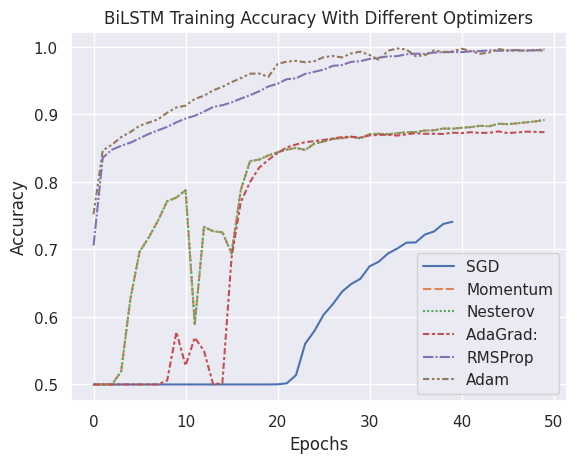

In [17]:
sns.set_theme()
sns.lineplot(data=acc_dict)
plt.title("BiLSTM Training Accuracy With Different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

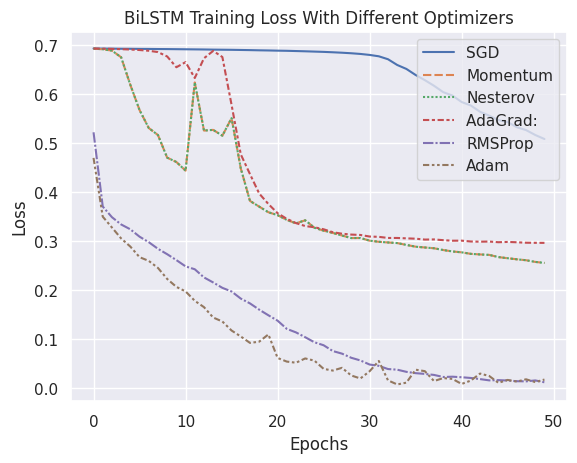

In [20]:
sns.set_theme()
sns.lineplot(data=loss_dict)
plt.title("BiLSTM Training Loss With Different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()